# Zero to Hero

## 1.07 Aplicando el arbol

Se aplicará el modelo generado por rpart a los datos nuevos y se genera la salida para Kaggle

In [1]:
rm( list=ls())
gc()

library( "data.table")   #cargo la libreria  data.table
library( "rpart")  #cargo la libreria  rpart
library( "rpart.plot")

options(repr.plot.width=20, repr.plot.height=10) 
setwd("C:\\Users\\programadorweb4\\Documents\\m_d_m\\dmef")  #Aqui se debe poner la ruta de la PC local

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,604167,32.3,1291145,69,1291145,69.0
Vcells,1086273,8.3,8388608,64,1632192,12.5


In [2]:
dataset <- fread("./datasets/competencia1_2022.csv")   #cargo el dataset #cargo el dataset

In [3]:
dtrain <- dataset[ foto_mes==202101 ]
dapply <- dataset[ foto_mes==202103 ]

In [4]:
#genero el modelo
modelo <-  rpart::rpart(formula= "clase_ternaria ~ ." ,
                        data= dtrain,
                        xval= 0,
                        cp= -1,
                        maxdepth= 2 )

Cargo el dataset a donde voy a aplicar el modelo

Aplico el modelo a los datos dapply  pidiendo que me devuelva probabildades

In [5]:
prediccion  <- predict( modelo, dapply, type = "prob")

Analizo que queda en prediccion

In [6]:
head( prediccion )

,BAJA+1,BAJA+2,CONTINUA
1,0.002109261,0.002455153,0.9954356
2,0.011096962,0.012552301,0.9763507
3,0.002109261,0.002455153,0.9954356
4,0.002109261,0.002455153,0.9954356
5,0.002109261,0.002455153,0.9954356
6,0.002109261,0.002455153,0.9954356


Prediccion es una matriz; me interesa la columna "BAJA+2"  que es la probabilidad que modelo asigna a cada registro de dapply

In [7]:
prob_baja2  <- prediccion[, "BAJA+2"]

In [8]:
head( prob_baja2)

1           2           3           4           5           6 
0.002455153 0.012552301 0.002455153 0.002455153 0.002455153 0.002455153

prob_baja2 es el vector de probabilidades

In [9]:
length( prob_baja2 )
nrow( dapply )

[1] 162900

[1] 162900

Ahora decido si envio el estimulo o no
<br>
si prob( BAJA+2) > 0.025  envio  el estímulo

In [10]:
Predicted   <- ifelse( prob_baja2 > 0.025, 1, 0 )

In [11]:
head( Predicted)

1 2 3 4 5 6 
0 0 0 0 0 0

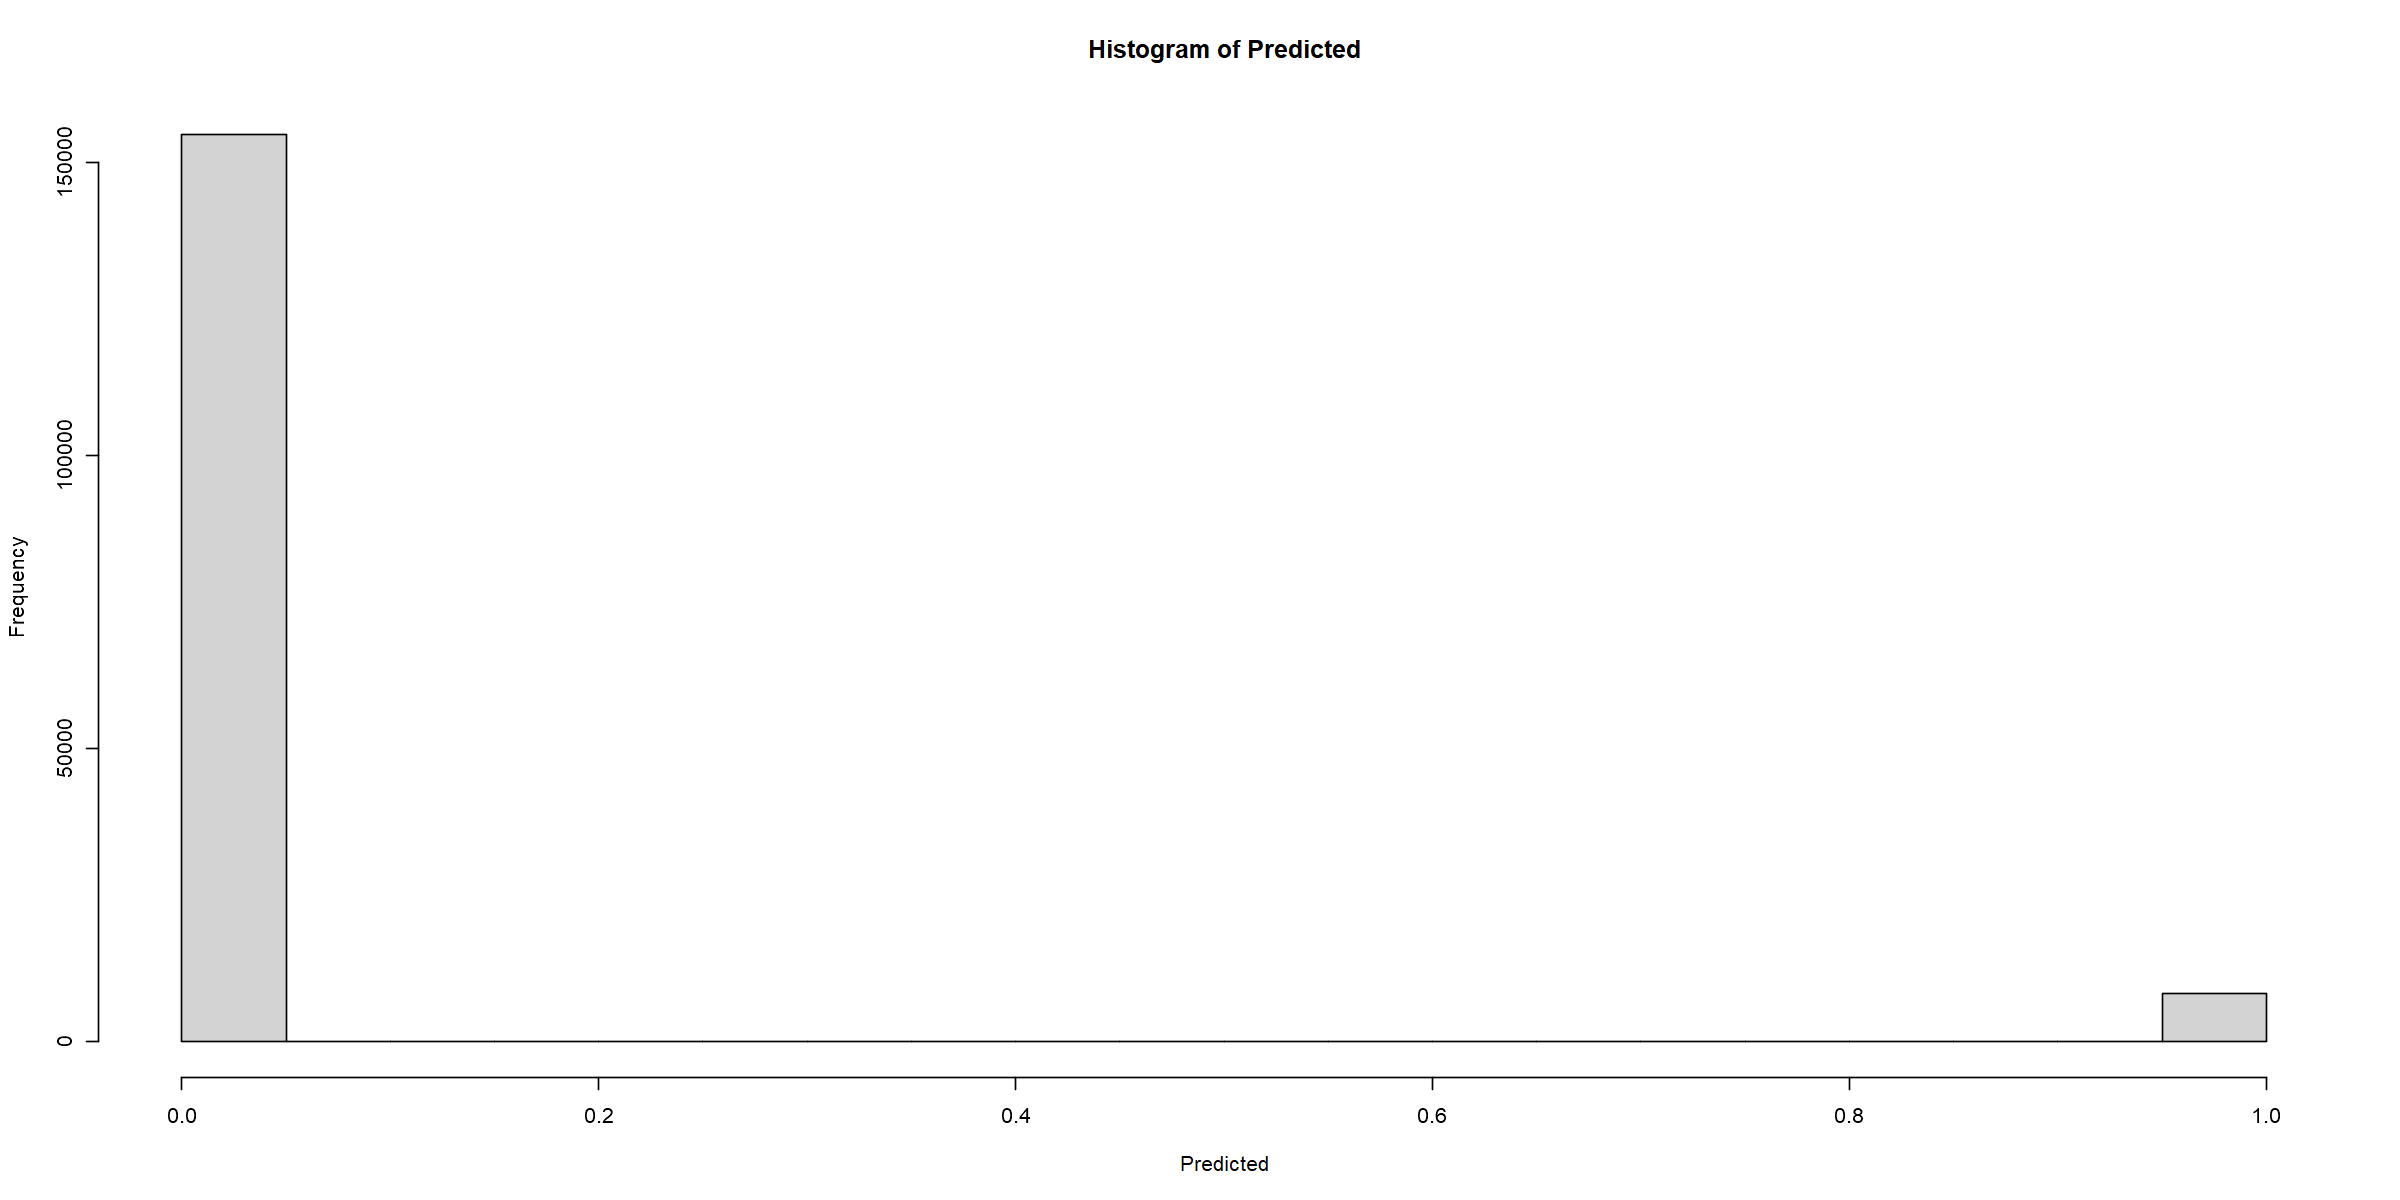

In [12]:
hist( Predicted)

creo una tabla con  lo que voy a enviar a Kaggle

In [13]:
entrega  <-  as.data.table( list( "numero_de_cliente"=dapply$numero_de_cliente, "Predicted"=Predicted)  )

In [14]:
head( entrega)

numero_de_cliente,Predicted
<int>,<dbl>
31115668,0
31115678,0
31117415,0
31117711,0
31118145,0
31118204,0


In [15]:
entrega[ , .N, Predicted]

Predicted,N
<dbl>,<int>
0,154716
1,8184


Esto significa que se enviaran 8184 estímulos

In [ ]:
#genero el archivo para Kaggle
#creo la carpeta donde va el experimento
dir.create( "./exp/",  showWarnings = FALSE ) 
dir.create( "./exp/ZH2017/", showWarnings = FALSE )

fwrite( entrega, 
        file= "./exp/ZH2017/para_Kaggle_0107.csv",
        sep=  "," )